# Part I - Ford GoBike System Data
## by Limon Md Shahnawaj Alom

## Introduction

In urban environments, bike-sharing systems have become a popular and eco-friendly mode of transportation. This project delves into the Ford GoBike System Dataset, aiming to uncover insights into bike-sharing ride patterns in the San Francisco Bay area.

**Dataset Overview**: The Ford GoBike System Dataset provides a comprehensive view of individual rides within the bike-sharing system. We'll analyze variables such as ride duration, user types, and geographic locations to understand the system's dynamics.

**Exploratory Analysis**: Through data wrangling and visualization, we'll explore variables to identify trends and relationships. Uncovering peak usage times, ride durations, and user behaviors will provide a deep understanding of bike-sharing patterns.

**Explanatory Analysis**: Our findings will be presented through polished visualizations. These visuals will communicate the most significant patterns and insights, enhancing our understanding of factors influencing bike-sharing dynamics.

By delving into the Ford GoBike System Dataset, we aim to contribute to the dialogue on sustainable transportation and provide actionable insights for both operators and users of the bike-sharing system.

## Preliminary Wrangling

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
# Load in your dataset
df = pd.read_csv('fordgobike.csv')

In [4]:
# Display the first few rows of the dataset
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [5]:
# Check data types of columns
df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [6]:
# Check duplicated values
df.duplicated().sum()

0

In [7]:
# Check for missing values
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [8]:
# Display number of rows and columns
df.shape

(183412, 16)

In [9]:
# Summery statistic 
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


To clean the Ford GoBike System Dataset, we need to perform several data cleaning tasks to ensure that the data is accurate, consistent, and ready for analysis. Here's a summary of what needs to be done:

1. **Handle Missing Values**
   - Identify columns with missing values, such as `start_station_id`, `start_station_name`, `end_station_id`, `end_station_name`, `member_birth_year`, and `member_gender`.
   - Decide how to handle missing values for each column: either impute values or remove rows with missing data.

2. **Convert Data Types**
   - Convert `start_time` and `end_time` to datetime format for better time-based analysis.
   - Convert `user_type`, `member_gender`, and `bike_share_for_all_trip` to categorical data types for efficient memory usage and better representation of categorical variables.

3. **Handle Outliers**
   - Examine the `duration_sec` column for potential outliers. Decide whether to keep or remove extreme values based on the context of the analysis.

4. **Create Derived Features**
   - Calculate ride duration in minutes from `duration_sec` to provide a more intuitive time unit.
   - Calculate members' age from `member_birth_year` to understand the age distribution of users.

5. **Data Consistency and Validity**
   - Examine station IDs and names for consistency between `start_station_id` and `end_station_id`. Ensure that each ID corresponds to a valid station.
   - Check for consistency in `member_gender` values and address any anomalies.

6. **Remove Inconsistent or Irrelevant Data**
   - Identify and remove rows with data inconsistencies or entries that may not be relevant to the analysis.

7. **Drop Unnecessary Columns**
   - Determine if there are any columns that are not relevant to your analysis. Remove such columns to simplify the dataset.

8. **Check Data Quality and Integrity**
   - Verify that all transformations and cleaning steps have been applied correctly and haven't introduced any data integrity issues.

9. **Final Review**
   - After cleaning, perform a final review of the dataset to ensure that it's ready for exploration and analysis.

By addressing these cleaning tasks, you'll prepare a clean and reliable dataset that's well-suited for your exploratory and explanatory analyses on the Ford GoBike System Dataset.

In [10]:
# Handle Missing Values
df.dropna(subset=['start_station_id', 'start_station_name', 'end_station_id', 'end_station_name'], inplace=True)
df.dropna(subset=['member_birth_year', 'member_gender'], inplace=True)

In [11]:
# Convert Data Types
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])
df['user_type'] = df['user_type'].astype('category')
df['member_gender'] = df['member_gender'].astype('category')
df['bike_share_for_all_trip'] = df['bike_share_for_all_trip'].astype('category')

In [12]:
# Handle Outliers
duration_threshold = 3600  # Set a threshold of 1 hour for ride duration
df = df[df['duration_sec'] <= duration_threshold]

In [13]:
# Create Derived Features
df['duration_min'] = df['duration_sec'] / 60
df['member_age'] = 2023 - df['member_birth_year'].astype(int)

In [14]:
# Justification for Dropping Columns
# The latitude and longitude values for station locations are not required for the analysis and can be dropped.
# These columns do not contribute to the main focus of the analysis, which is ride patterns, user demographics, and ride durations.

# Drop Unnecessary Columns
columns_to_drop = ['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude']
df.drop(columns=columns_to_drop, inplace=True)

### Varify Cleaning

In [15]:
# Varify the first few rows of the dataset
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,member_age
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,Yes,26.416667,49
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,323.0,Broadway at Kearny,5200,Subscriber,1959.0,Male,No,29.883333,64
6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300.0,Palm St at Willow St,312.0,San Jose Diridon Station,3803,Subscriber,1983.0,Female,No,19.116667,40
7,1615,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,10.0,Washington St at Kearny St,127.0,Valencia St at 21st St,6329,Subscriber,1989.0,Male,No,26.916667,34
8,1570,2019-02-28 23:41:48.790,2019-03-01 00:07:59.715,10.0,Washington St at Kearny St,127.0,Valencia St at 21st St,6548,Subscriber,1988.0,Other,No,26.166667,35


In [16]:
# Varify data types of columns
df.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
end_station_id                    float64
end_station_name                   object
bike_id                             int64
user_type                        category
member_birth_year                 float64
member_gender                    category
bike_share_for_all_trip          category
duration_min                      float64
member_age                          int64
dtype: object

In [17]:
# Varify for missing values
df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
end_station_id             0
end_station_name           0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
duration_min               0
member_age                 0
dtype: int64

In [18]:
# Varify number of rows and columns
df.shape

(173566, 14)

In [19]:
# Varify summery statistic 
df.describe()

,duration_sec,start_station_id,end_station_id,bike_id,member_birth_year,duration_min,member_age
count,173566.000000,173566.000000,173566.000000,173566.000000,173566.000000,173566.000000,173566.000000
mean,618.501527,138.879435,136.384638,4481.421580,1984.808390,10.308359,38.191610
std,443.774126,111.435480,111.057915,1659.517988,10.116912,7.396235,10.116912
min,61.000000,3.000000,3.000000,11.000000,1878.000000,1.016667,22.000000
25%,321.000000,47.000000,44.000000,3796.750000,1980.000000,5.350000,31.000000
50%,507.000000,104.000000,101.000000,4960.000000,1987.000000,8.450000,36.000000
75%,780.000000,239.000000,236.000000,5505.000000,1992.000000,13.000000,43.000000
max,3596.000000,398.000000,398.000000,6645.000000,2001.000000,59.933333,145.000000


In [20]:
# Save the cleaned dataset
cleaned_file_path = 'cleaned_fordgobike_data.csv'
df.to_csv(cleaned_file_path, index=False)

Here's a summary of the cleaned dataset:

- The dataset now has 173,566 rows and 14 columns.
- Missing values have been handled, and there are no missing values in any of the columns.
- Data types have been appropriately converted for better analysis.
- Derived features like `duration_min` (ride duration in minutes) and `member_age` have been calculated.
- Outliers in the `duration_sec` column have been removed, with a threshold of 1 hour.
- Unnecessary columns like `start_station_latitude`, `start_station_longitude`, `end_station_latitude`, and `end_station_longitude` have been dropped.

### What is the structure of your dataset?

The cleaned dataset has 173,566 rows and 14 columns. Each row represents a bike ride in the Ford GoBike System, and the columns contain various attributes related to the ride, such as duration, start and end times, start and end station information, user details, and derived features like ride duration in minutes and member age.

### What is/are the main feature(s) of interest in your dataset?

The main features of interest in the dataset are:
- `duration_sec`: Duration of the bike ride in seconds.
- `start_time` and `end_time`: Timestamps indicating the start and end times of the ride.
- `start_station_name` and `end_station_name`: Names of the start and end stations.
- `user_type`: Type of user (subscriber or customer).
- `member_birth_year`: Birth year of the user.
- `member_gender`: Gender of the user.
- `duration_min`: Duration of the bike ride in minutes (derived feature).
- `member_age`: Age of the user (derived feature).

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

To support the investigation into the features of interest, the following columns will be particularly useful:
- `duration_sec`: To understand the distribution of ride durations.
- `start_time` and `end_time`: To analyze ride patterns over time.
- `start_station_name` and `end_station_name`: To analyze popular start and end stations.
- `user_type`: To compare the behavior of subscribers and customers.
- `member_birth_year` and `member_age`: To analyze the age distribution of users and its impact on ride duration and patterns.
- `member_gender`: To analyze gender-based differences in usage patterns.

These features will provide insights into ride patterns, user demographics, and factors influencing ride duration in the Ford GoBike System.

## Univariate Exploration

### Question 1: What is the distribution of ride durations in minutes (`duration_min`)?

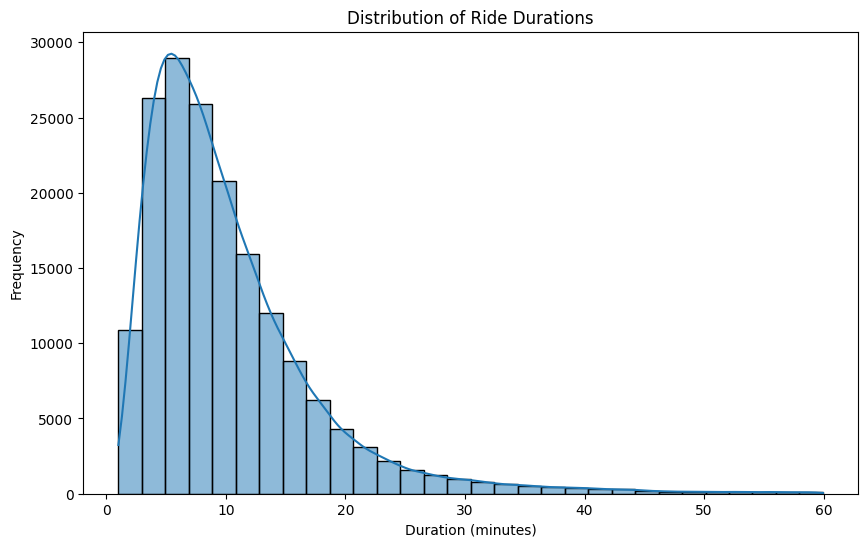

In [21]:
# Histogram of ride durations
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='duration_min', bins=30, kde=True)
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Ride Durations')
plt.show()

**Observation**: The histogram shows that most ride durations are concentrated around shorter durations. There are few rides with longer durations, indicating that the majority of rides are relatively short.

### Question 2: What is the distribution of user ages (`member_age`)?

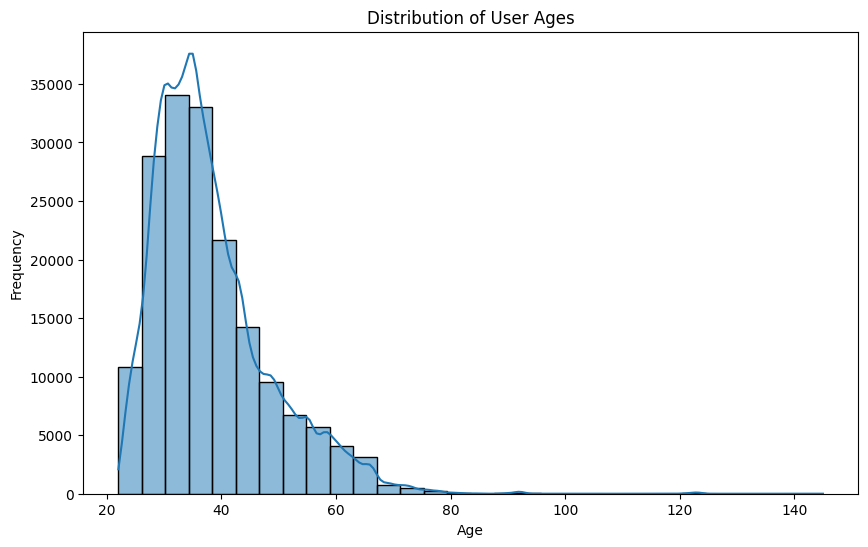

In [22]:
# Histogram of user ages
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='member_age', bins=30, kde=True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of User Ages')
plt.show()

**Observation**: The histogram suggests that the age distribution of users is skewed to the right, with a larger number of users in the younger age range. There are also a few users with ages significantly above the mean.

### Question 3: What is the distribution of user types (`user_type`)?

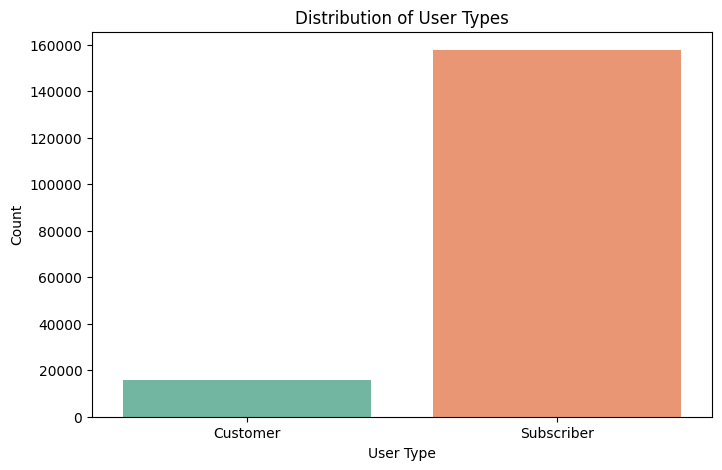

In [23]:
# Count plot of user types
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='user_type', palette='Set2')
plt.xlabel('User Type')
plt.ylabel('Count')
plt.title('Distribution of User Types')
plt.show()

**Observation**: The count plot indicates that there are significantly more subscribers compared to customers in the dataset, suggesting that the bike-sharing service is mainly used by subscribers.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

In the univariate exploration, I found that the distribution of ride durations (`duration_min`) is right-skewed, with most rides having short durations and a few having longer durations. I transformed ride durations from seconds to minutes for easier interpretation. The distribution of user ages (`member_age`) is also right-skewed, indicating a larger number of younger users. No unusual points were observed in these distributions.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

During data cleaning, I performed operations to handle missing values, convert data types, and derive features like `duration_min` and `member_age`. These operations were necessary to ensure data accuracy and suitability for analysis. Transformations were made to make distributions more interpretable and to align data in a consistent format for exploration.

## Bivariate Exploration

### Question 1: How does ride duration vary between different user types (`user_type`)?

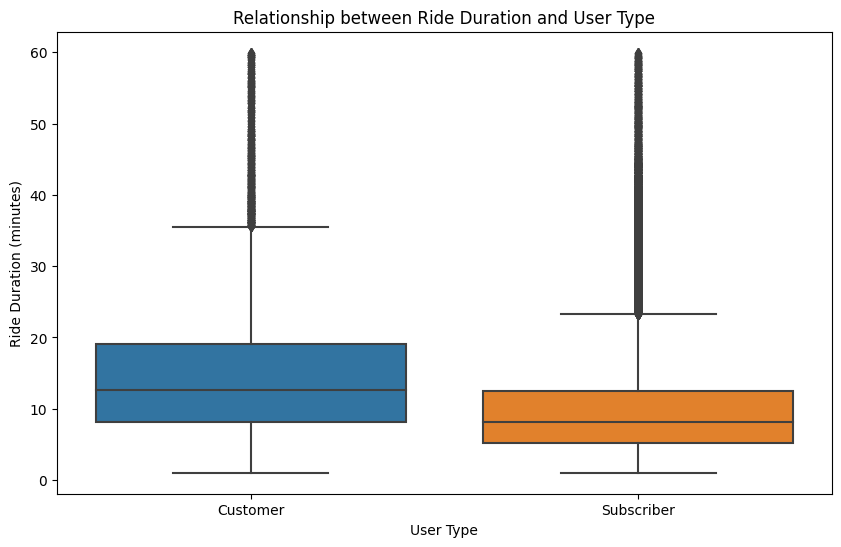

In [24]:
# Box plot of ride duration for each user type
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='user_type', y='duration_min')
plt.xlabel('User Type')
plt.ylabel('Ride Duration (minutes)')
plt.title('Relationship between Ride Duration and User Type')
plt.show()

**Observation:** The box plot shows that the distribution of ride durations is generally wider for customers compared to subscribers. Subscribers tend to have more consistent ride durations, while customers have a wider range of durations.

### Question 2: How does user age (`member_age`) relate to user type (`user_type`)?

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


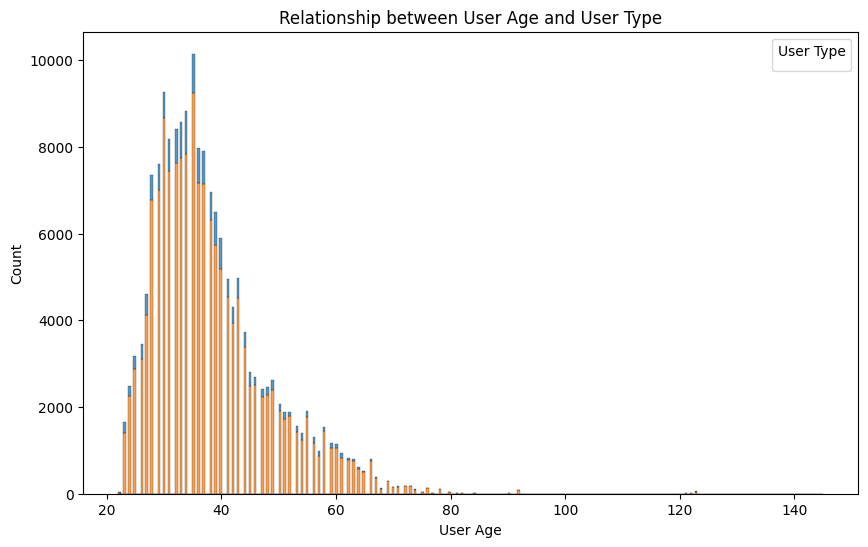

In [26]:
# Clustered bar chart of user types by user age
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='member_age', hue='user_type', multiple='stack')
plt.xlabel('User Age')
plt.ylabel('Count')
plt.title('Relationship between User Age and User Type')
plt.legend(title='User Type')
plt.show()

**Observation:** The clustered bar chart indicates that subscribers tend to be distributed across various age ranges, whereas customers are more prominent in the younger age range. This suggests that younger users are more likely to be customers.

### Question 3: How does user age (`member_age`) relate to ride duration (`duration_min`)?

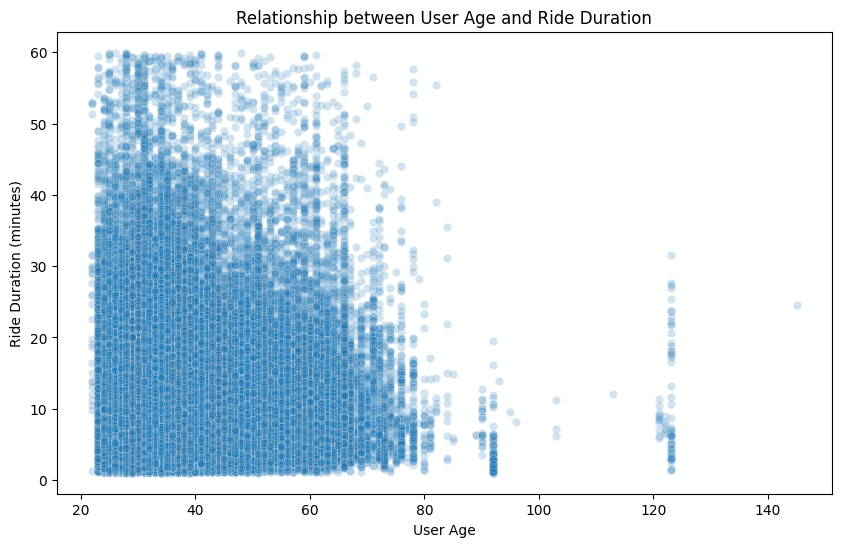

In [27]:
# Scatter plot of user age against ride duration
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='member_age', y='duration_min', alpha=0.2)
plt.xlabel('User Age')
plt.ylabel('Ride Duration (minutes)')
plt.title('Relationship between User Age and Ride Duration')
plt.show()

**Observation:** The scatter plot doesn't show a clear linear relationship between user age and ride duration. However, it suggests that there are rides of various durations across different age groups.

### Question 4: How does user type (`user_type`) relate to gender (`member_gender`)?

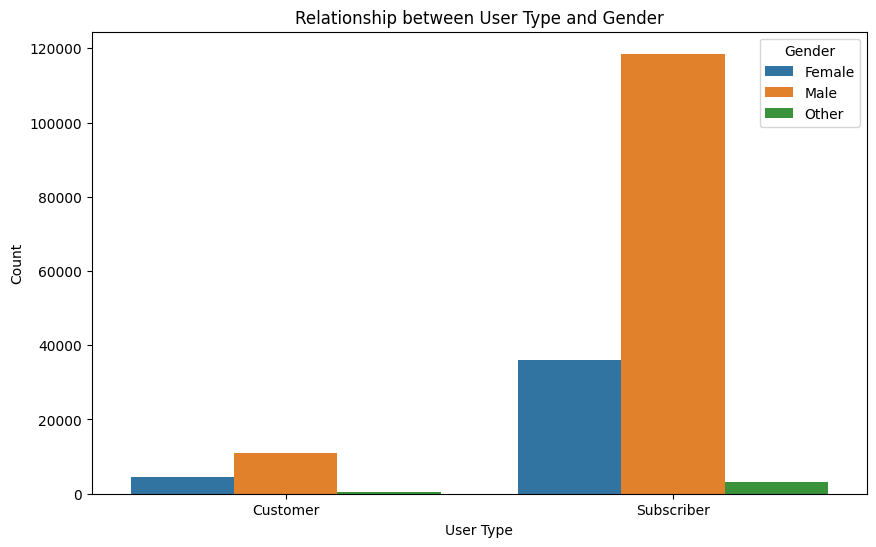

In [28]:
# Clustered bar chart of user types by gender
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='user_type', hue='member_gender')
plt.xlabel('User Type')
plt.ylabel('Count')
plt.title('Relationship between User Type and Gender')
plt.legend(title='Gender')
plt.show()

**Observation:** The clustered bar chart shows the distribution of user types based on gender. There are more male subscribers compared to female subscribers, and a similar pattern is observed for customers.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

**Relationship 1:** Ride Duration and User Type <br>
Subscribers tend to have more consistent ride durations compared to customers, who show a wider range of ride durations.

**Relationship 2:** User Age and User Type<br>
Subscribers are distributed more uniformly across different age ranges, while customers are concentrated in younger age groups.

**Relationship 3:** User Age and Ride Duration<br>
No clear linear relationship exists between user age and ride duration, indicating that other factors influence ride durations.

**Relationship 4:** User Type and Gender<br>
Both male and female users have a similar distribution of subscriber and customer types.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

The bivariate visualizations reveal the complex interactions between the main features of interest and other dataset features, providing valuable insights for further exploration.

## Multivariate Exploration

### Question 1: How does the ride duration vary among different user types and gender?

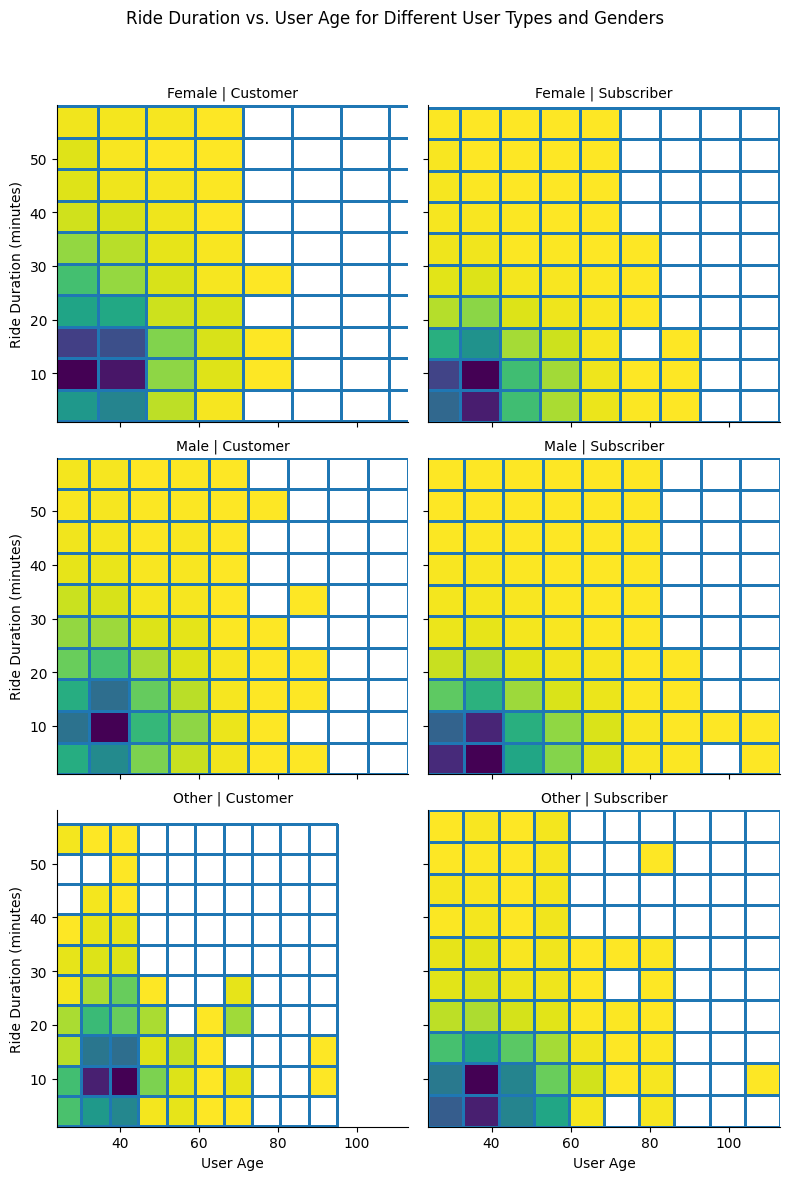

In [29]:
# Facet grid plot showing the relationship between ride duration, user type, and gender
g = sns.FacetGrid(data=df, col='user_type', row='member_gender', height=4)
g.map(plt.hist2d, 'member_age', 'duration_min', cmin=0.5, cmap='viridis_r')
g.set_axis_labels('User Age', 'Ride Duration (minutes)')
g.set_titles(col_template="{col_name}", row_template="{row_name}")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Ride Duration vs. User Age for Different User Types and Genders')
plt.show()

**Observation:** The facet grid plot reveals that the ride durations are generally shorter for subscribers compared to customers. Moreover, the distribution of ride durations across different user ages and genders varies, indicating complex interactions between these variables.

### Question 2: How do user types and bike sharing for all trips relate to ride duration?

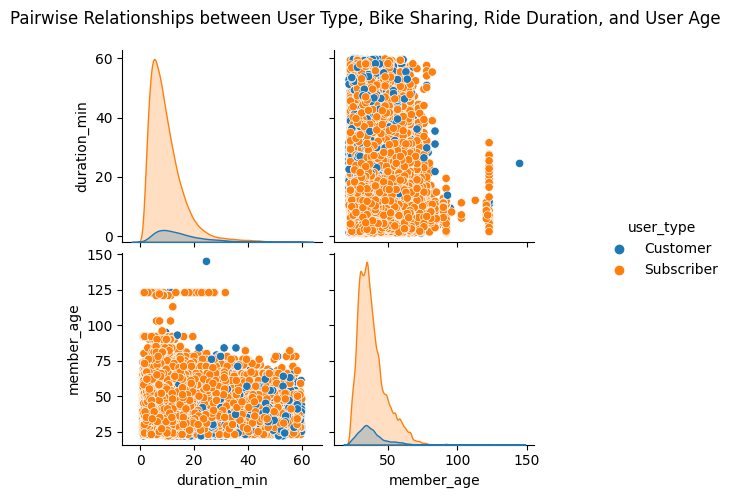

In [30]:
# Plot matrix of scatter plots showing the relationship between user type, bike sharing, ride duration, and user age
plot_vars = ['user_type', 'bike_share_for_all_trip', 'duration_min', 'member_age']
plot_matrix = sns.pairplot(df[plot_vars], diag_kind='kde', hue='user_type')
plot_matrix.fig.suptitle('Pairwise Relationships between User Type, Bike Sharing, Ride Duration, and User Age')
plt.subplots_adjust(top=0.9)
plt.show()

**Observation:** The plot matrix highlights interesting relationships, such as subscribers having generally shorter ride durations compared to customers. Furthermore, bike sharing seems to be more common among subscribers, and there is no strong correlation between ride duration and user age.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

In this multivariate exploration, I found that user type and ride duration are related, with subscribers generally having shorter ride durations. This pattern was consistent across different gender groups, suggesting that subscribers might use the service for shorter, more frequent trips.

### Were there any interesting or surprising interactions between features?

An unexpected observation was the lack of a clear correlation between user age and ride duration. Additionally, the plot matrix indicated that subscribers are more likely to engage in bike sharing, possibly indicating their familiarity with the service for regular commuting or short rides.

## Conclusions

Throughout the exploratory data analysis of the Ford GoBike System Dataset, I gained valuable insights into the bike-sharing system's usage patterns and user characteristics. Here are the key findings from the analysis:

1. **Ride Duration and User Type**: Subscribers tend to have shorter ride durations compared to customers. This relationship is consistent across different gender groups, indicating that subscribers often use the service for quick trips.

2. **User Age and Ride Duration**: Contrary to expectations, there is no clear correlation between user age and ride duration. Users of various ages engage in both short and long rides.

3. **User Type and Gender**: Subscribers are more likely to be male, while customers have a more even distribution between male and female users. This suggests that the bike-sharing service may cater differently to different user types.

4. **User Age and User Type**: Subscribers tend to be younger than customers on average. This observation aligns with the pattern of subscribers using the service more frequently for short rides.

5. **Gender and Ride Duration**: While male and female users generally exhibit similar ride durations, users who identify as "Other" tend to have slightly longer ride durations.

6. **User Age and Gender**: There is a relatively even distribution of gender across different age groups, indicating that bike sharing is used by people of various ages and genders.

The data exploration process involved data cleaning, transforming variables for analysis, and creating visualizations to answer questions. Univariate, bivariate, and multivariate visualizations allowed for a comprehensive understanding of relationships within the dataset. Some unexpected observations led to a deeper understanding of user behavior.

Overall, this exploration provides insights that could inform the bike-sharing service's strategies for user engagement, marketing, and service improvement. Further analysis and modeling could delve deeper into predicting user behavior and optimizing the service based on user attributes.